# 내가 받는 팁 예측하기

[이전 실습](./Exploration5(1)-Macbook_price_prediction.ipynb)에서는 column이 하나일 때 결과를 예측하는 것을 했었습니다. 이번에는 다양한 변수가 있을 때 결과를 예측하는 모델을 만들어봅시다!

> 다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계하기


이번에 사용할 데이터는 손님 테이블에 대한 여러가지 정보가 담긴 데이터셋입니다. 그 테이블이 낼 팁(tip)을 예측해봅시다. 

팁 데이터셋은 데이터 시각화 패키지인 seaborn 패키지 안에 포함되어 있습니다.

seaborn은 matplotlib과 비슷하게 데이터에 대한 시각화를 제공하는 패키지로, 간단하고 가벼운 그래프에 최적화 되어있는 matplotlib과 달리 시각화 자체의 기능을 더 살려서 예쁘고 다양한 형태의 그래프를 그릴 수 있도록 만들어진 패키지입니다.


seaborn은 간단한 데이터셋으로 여러 실험을 해볼 수 있도록 샘플 데이터셋을 제공합니다. seaborn 에서 데이터를 불러와볼까요?

## 1. 데이터 준비하기

In [1]:
import seaborn as sns

sns.get_dataset_names()

/home/aiffel0039/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /home/aiffel0039/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

여러 데이터들이 있는데요, 이중 우리가 오늘 사용해볼 팁 데이터는 `tips` 데이터로, `sns.load_dataset("tips")`로 불러올 수 있습니다.

In [6]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head(10)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


총 244개의 행과 7개의 열로 이루어져 있습니다.

각 칼럼은 아래와 같은 정보를 나타냅니다.

- `total_bill` : 테이블의 전체 지불 금액
- `tip` : 팁으로 낸 금액
- `sex` : 웨이터의 성별
- `smoker` : 손님의 흡연 여부
- `day` : 요일
- `time` : 시간
- `size` : 테이블 인원수

그런데 한가지 문제가 있습니다. 바로 문자열 형태의 데이터가 몇몇 있다는 것입니다.

우리는 위에서 살펴봤듯 수식에 데이터를 넣어서 계산할 것이기 때문에 모든 데이터의 값이 실수여야 합니다.

따라서 다음과 같이 판다스의 `get_dummies()` 함수를 활용해 문자열 데이터에 대해서는 `0`, `1`로 변환해 줃록 하겠습니다. 수식을 구할 때 카테고리형 데이터가 있다면 더미변수(dummy variable)를 활용해 식에 포함시켜줄 수 있습니다.

In [9]:
import pandas as pd

tips = pd.get_dummies(tips, columns = ['sex', 'smoker', 'day', 'time'])
tips.head(10)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
5,25.29,4.71,4,1,0,0,1,0,0,0,1,0,1
6,8.77,2.00,2,1,0,0,1,0,0,0,1,0,1
7,26.88,3.12,4,1,0,0,1,0,0,0,1,0,1
8,15.04,1.96,2,1,0,0,1,0,0,0,1,0,1
9,14.78,3.23,2,1,0,0,1,0,0,0,1,0,1


문자열 데이터는 모두 사라지고 대신 `sex_Male`, `sex_Female`과 같이 각 카테고리에 대한 칼럼이 새로 만들어졌습니다.

이렇게 내가 가지고 있는 데이터 중 실수형 데이터가 아닌 카테고리 데이터일때에는 pandas의 `get_dummies` 함수로 간편하게 숫자 데이터로 변환해줄 수 있습니다. <br/>
이런 데이터 변환 방식을 **원-핫 인코딩(One Hot Encoding)** 이라고 합니다.

그럼 이제 칼럼의 순서를 한번 바꿔볼까요?

In [10]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


이제 칼럼이 12개가 되었습니다. 

x와 y를 분류해주고 train 데이터와 test 데이터로 분류해주면 준비가 끝날 것 같네요!

In [11]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


## 2. 모델 설계하기

그럼 앞의 실습에서 했던대로, 최적의 w와 b의 값을 구해봅시다!

가장 먼저 12개의 w와 b에 랜덤한 값을 넣어줍시다.

In [15]:
import numpy as np

W = np.random.rand(12)
b = np.random.rand()

print(W, b)

[0.43562917 0.75752918 0.02263007 0.00100189 0.97938268 0.42315549
 0.64197034 0.52000787 0.36647675 0.49346858 0.96832754 0.12403837] 0.893543379694071


이제 모델을 준비해볼까요? 모델은 아래와 같은 식이 될 것입니다. 


y
=
w
1
x
1
+
w
2
x
2
+
w
3
x
3
+
w
4
x
4
+
w
5
x
5
+
w
6
x
6
+
w
7
x
7
+
w
8
x
8
+
w
9
x
9
+
w
10
x
10
+
w
11
x
11
+
w
12
x
12
+
b

for 구문을 활용해 1부터 12까지 **x \* w**를 수행하고 마지막에 b를 더해주도록 합시다!

In [21]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

손실함수는 이번에는 RMSE 대신 MSE를 사용해봅시다.

In [17]:
def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

In [31]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

이번이 마지막입니다!! Gradient를 계산해봅시다.

In [22]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [24]:
dW, db = gradient(X, W, b, y)
print("dW : ", dW)
print("db : ", db)

dW :  [9208.76126678 1128.73851378  268.70694535  136.27611868  163.46628218
  241.51678186  101.95068237   28.67448451  143.69569793  130.66219923
  109.84431579  295.13874825]
db :  19.917199870582863


이번엔 학습률을 0.001로 두겠습니다. 이제 반복해서 가중치를 업데이트하며 학습을 진행해봅시다.

In [25]:
LEARNING_RATE = 0.0001

In [26]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i%10 == 0:
        print(i, "th Loss : %0.4f"%(L))

10 th Loss : 2.4058
20 th Loss : 2.3251
30 th Loss : 2.2658
40 th Loss : 2.2099
50 th Loss : 2.1570
60 th Loss : 2.1071
70 th Loss : 2.0598
80 th Loss : 2.0151
90 th Loss : 1.9728
100 th Loss : 1.9328
110 th Loss : 1.8948
120 th Loss : 1.8589
130 th Loss : 1.8248
140 th Loss : 1.7925
150 th Loss : 1.7619
160 th Loss : 1.7328
170 th Loss : 1.7052
180 th Loss : 1.6790
190 th Loss : 1.6541
200 th Loss : 1.6304
210 th Loss : 1.6078
220 th Loss : 1.5864
230 th Loss : 1.5660
240 th Loss : 1.5465
250 th Loss : 1.5280
260 th Loss : 1.5104
270 th Loss : 1.4935
280 th Loss : 1.4774
290 th Loss : 1.4621
300 th Loss : 1.4475
310 th Loss : 1.4335
320 th Loss : 1.4201
330 th Loss : 1.4073
340 th Loss : 1.3950
350 th Loss : 1.3833
360 th Loss : 1.3721
370 th Loss : 1.3613
380 th Loss : 1.3510
390 th Loss : 1.3412
400 th Loss : 1.3317
410 th Loss : 1.3226
420 th Loss : 1.3138
430 th Loss : 1.3054
440 th Loss : 1.2974
450 th Loss : 1.2896
460 th Loss : 1.2822
470 th Loss : 1.2750
480 th Loss : 1.2681
4

그럼 한번 확인해볼까요?

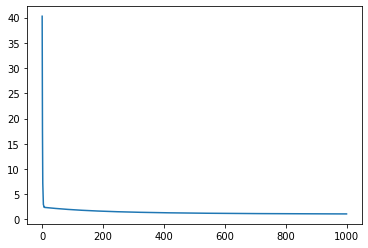

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.show()

아주 효과적으로 잘 내려갑니다! W와 b의 값을 한번 확인해봅시다.

In [29]:
W, b

(array([ 0.07985696,  0.0530985 , -0.27571205, -0.33241049,  0.43424428,
         0.33653939,  0.19917281,  0.37949811,  0.2941262 ,  0.51737194,
         0.40637133,  0.05424008]),
 0.854666179839771)

## 3. 모델 성능 테스트

그럼 X_test 데이터와 y_test 데이터에 대해서도 예측을 해봅시다.



In [32]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6717723619806037

꽤나 잘 맞추는 것 같습니다.

한번 시각화를 해볼까요?

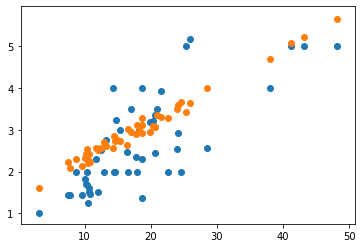

In [34]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()

x축에는 `total_bill`을, y축에는 각각 `tip`과 `prediction` 값을 표시했습니다.

꽤 괜찮은 것 같죠?

# 조금 더 쉽게 해볼까요?  - 사이킷런 라이브러리 활용하기

우리가 지금까지 했던 것들은 사실 사이킷런의 라이브러리를 사용하면 훨씬 쉽게 할 수 있슶니다!

다시 똑같은 과정을 해봅시다.

데이터 먼저 불러와봅시다

In [35]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [36]:
tips.head(10)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61
5,25.29,4,1,0,0,1,0,0,0,1,0,1,4.71
6,8.77,2,1,0,0,1,0,0,0,1,0,1,2.00
7,26.88,4,1,0,0,1,0,0,0,1,0,1,3.12
8,15.04,2,1,0,0,1,0,0,0,1,0,1,1.96
9,14.78,2,1,0,0,1,0,0,0,1,0,1,3.23


위에서 했던 것 같이 x와 y를 분리하고 train data와 test data를 분리해봅시다.

In [37]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

우리는 그냥 준비된 모델을 가져다 쓰기만 하면 됩니다.

선형 회귀 모델은 `sklearn.linear_model` 안에 `LinearRegression`로 내장되어 있습니다.

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

이렇게 하면 모델 준비가 끝이에요!! 

모델 학습은 `fit`을 시키면 됩니다.

In [41]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

정말 간단해졌습니다. 그럼 X_test 데이터에 대한 예측을 해볼까요?

In [42]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

잘 예측이 된 것 같습니다. 

그럼 이제 정답 데이터와 비교해 모델의 성능을 평가해봅시다. 모델의 성능은 `mse`로 계산해볼텐데, 이는 `sklearn.metrics`의 `mean_squared_error`에 들어있습니다.

In [43]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

0.70 정도의 성능으로, 이전 스텝에서 우리가 직접 만들었던 0.68과 유사한 성능을 보이고 있습니다.

한번 시각화를 해볼까요?

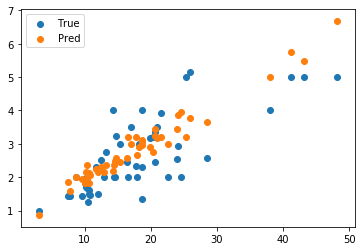

In [44]:
plt.scatter(X_test[:, 0], y_test, label="True")
plt.scatter(X_test[:, 0], predictions, label="Pred")
plt.legend()
plt.show()

조금 더 잘 맞추는 것 같죠?! :)